In [177]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots I will create


# read in the data

df = pd.read_csv(r'C:\Users\drako\Downloads\archive\movies.csv')

In [178]:
#looking at data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [179]:
#Looking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [180]:
# data types of the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [181]:
#Drop the rows with less null values 
columns_with_na = ['released', 'score', 'votes',
                   'writer', 'star', 'country',
                   'runtime']
df = df.dropna(axis=0, subset = columns_with_na)
df.isna().sum()

name           0
rating        72
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2166
gross        182
company       13
runtime        0
dtype: int64

In [182]:
#budget & gross are float so we will impute it with mean value
mean_value_budget = df['budget'].mean()
mean_value_gross = df['gross'].mean()
df['budget'].fillna(value=mean_value_budget, inplace=True)
df['gross'].fillna(value=mean_value_gross, inplace=True)

# company names are unique and null values are just 13 so we can remove the rows with company name as null,will not effect the dataset
df = df.dropna(axis=0, subset = ['company'])

df.isna().sum()

name         0
rating      69
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross        0
company      0
runtime      0
dtype: int64

In [183]:
#change datatype of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [184]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [185]:
pd.set_option('display.max_rows', None)

In [186]:
# Drop duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [187]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


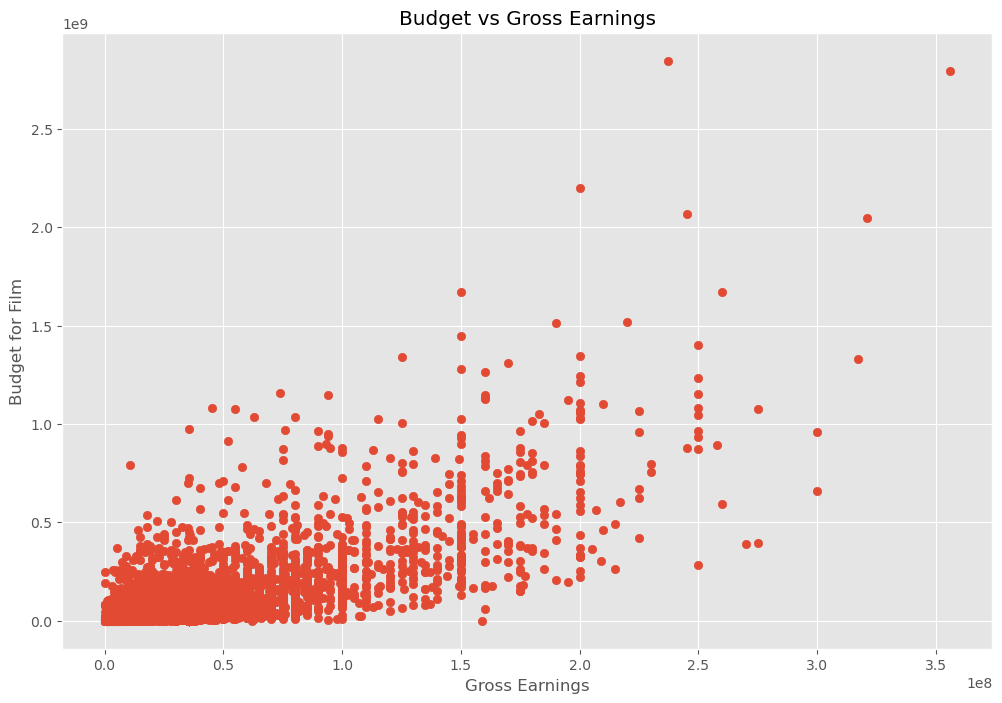

In [188]:
#Scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [189]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


Text(0.5, 1.0, 'Scatter Plot with Regression Line: Votes vs. Gross Earnings')

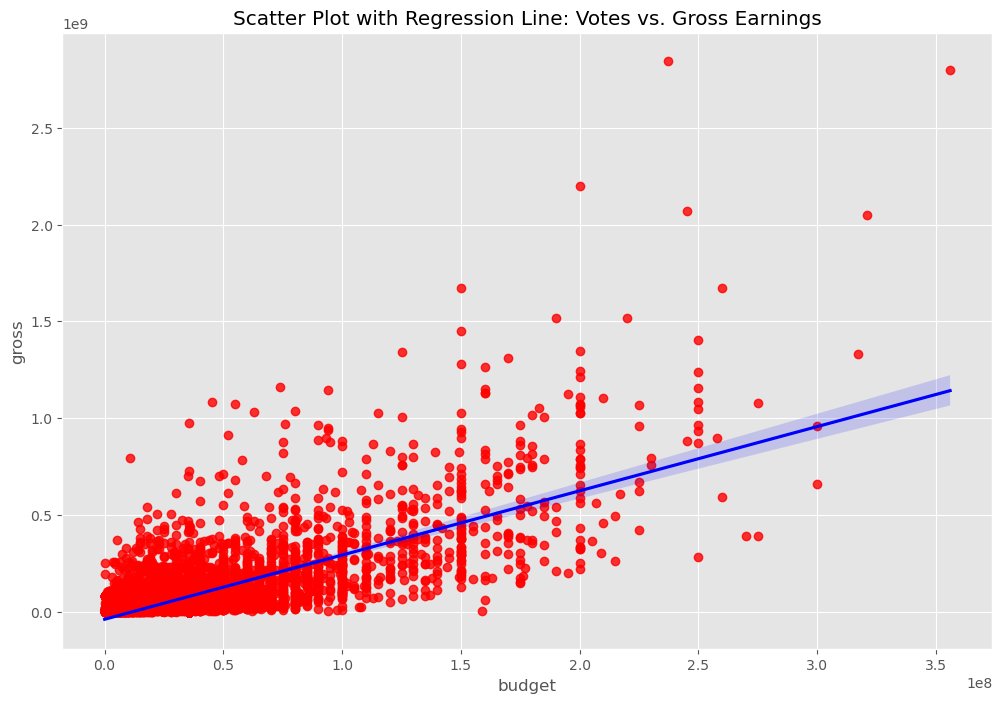

In [190]:
sns.regplot(x = 'budget', 
            y = 'gross', 
            data= df , 
            scatter_kws = {'color': 'red'}, 
            line_kws = {'color': 'blue'})

plt.title('Scatter Plot with Regression Line: Votes vs. Gross Earnings')

In [191]:
#Looking at correlation

df.corr(numeric_only=True, method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.098278,0.223353,0.267186,0.252436,0.119789
score,0.098278,1.000000,0.409432,0.064173,0.182866,0.399965
votes,0.223353,0.409432,1.000000,0.420829,0.628743,0.308907
budget,0.267186,0.064173,0.420829,1.000000,0.711616,0.265089
gross,0.252436,0.182866,0.628743,0.711616,1.000000,0.241296
runtime,0.119789,0.399965,0.308907,0.265089,0.241296,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

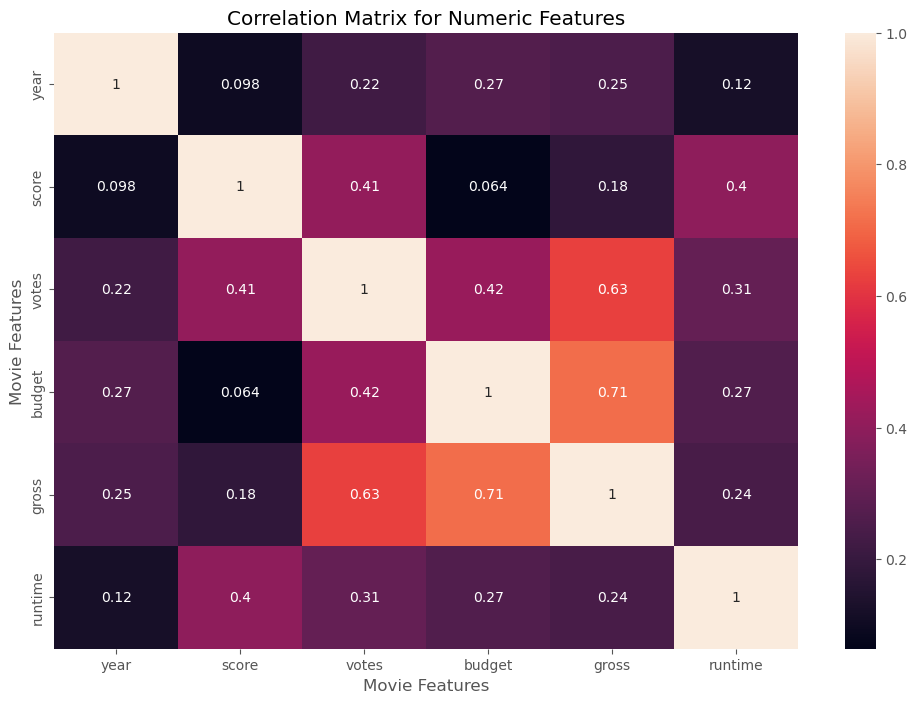

In [192]:
#High correlation between budget and gross

#Visualizing correlation

correlation_matrix = df.corr(numeric_only=True, method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show

In [193]:
#Looking at company

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,532,5,0,2009,693,7.8,1100000,1153,1774,2324,55,237000000,2847246203,2246,162
7445,534,5,0,2019,181,8.4,903000,162,739,2231,55,356000000,2797501328,1599,181
3045,6873,5,6,1997,701,7.8,1100000,1153,1774,1587,55,200000000,2201647264,2246,194
6663,5128,5,0,2015,695,7.8,876000,1123,2541,520,55,245000000,2069521700,1533,138
7244,535,5,0,2018,190,8.4,897000,162,739,2231,55,321000000,2048359754,1599,149


In [170]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


<function matplotlib.pyplot.show(close=None, block=None)>

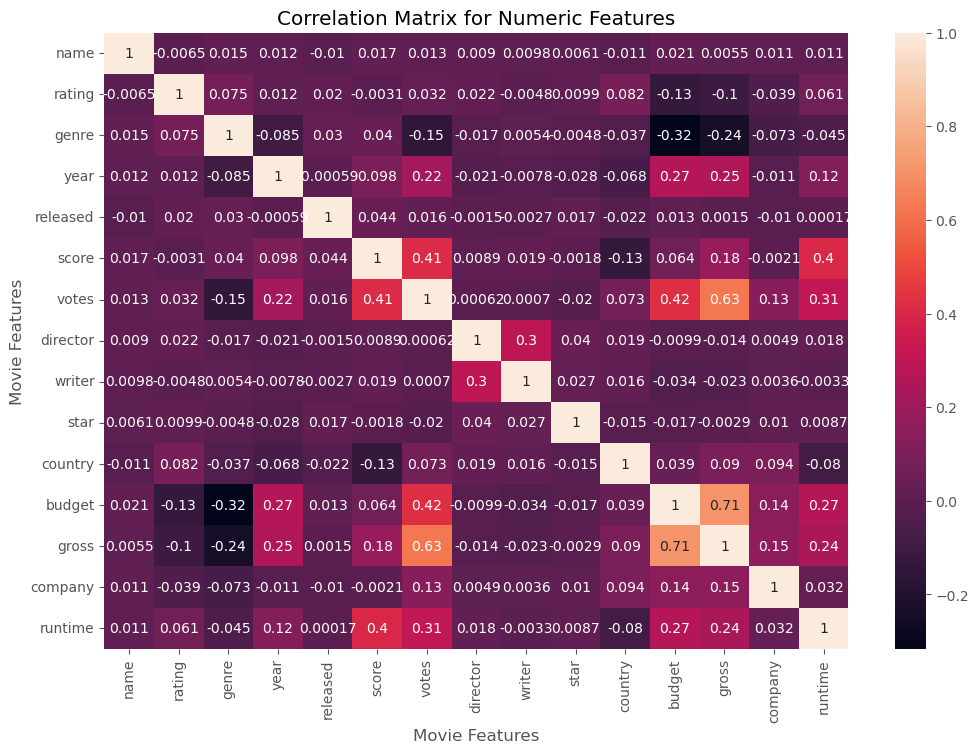

In [194]:
correlation_matrix = df_numerized.corr( method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show

In [195]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.006483,0.015231,0.011931,-0.010470,0.016603,0.013239,0.008970,0.009833,0.006140,-0.011042,0.020788,0.005515,0.010557,0.010673
rating,-0.006483,1.000000,0.075065,0.012400,0.019913,-0.003132,0.032286,0.022065,-0.004763,0.009854,0.081817,-0.132556,-0.104100,-0.038800,0.061110
genre,0.015231,0.075065,1.000000,-0.084693,0.030113,0.039793,-0.150201,-0.016630,0.005389,-0.004816,-0.036919,-0.315663,-0.237938,-0.072765,-0.045087
year,0.011931,0.012400,-0.084693,1.000000,-0.000594,0.098278,0.223353,-0.021358,-0.007794,-0.028390,-0.068436,0.267186,0.252436,-0.010606,0.119789
released,-0.010470,0.019913,0.030113,-0.000594,1.000000,0.043729,0.016338,-0.001545,-0.002700,0.016660,-0.022147,0.012857,0.001502,-0.009979,0.000171
score,0.016603,-0.003132,0.039793,0.098278,0.043729,1.000000,0.409432,0.008872,0.019022,-0.001797,-0.133115,0.064173,0.182866,-0.002070,0.399965
votes,0.013239,0.032286,-0.150201,0.223353,0.016338,0.409432,1.000000,0.000622,0.000700,-0.019819,0.073448,0.420829,0.628743,0.131659,0.308907
director,0.008970,0.022065,-0.016630,-0.021358,-0.001545,0.008872,0.000622,1.000000,0.299397,0.039811,0.019410,-0.009910,-0.014390,0.004879,0.017980
writer,0.009833,-0.004763,0.005389,-0.007794,-0.002700,0.019022,0.000700,0.299397,1.000000,0.027071,0.015722,-0.033511,-0.023203,0.003574,-0.003251
star,0.006140,0.009854,-0.004816,-0.028390,0.016660,-0.001797,-0.019819,0.039811,0.027071,1.000000,-0.014582,-0.017421,-0.002935,0.010235,0.008732


In [196]:
correlation_mat= df_numerized.corr()

corr_pairs= correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.006483
          genre       0.015231
          year        0.011931
          released   -0.010470
          score       0.016603
          votes       0.013239
          director    0.008970
          writer      0.009833
          star        0.006140
          country    -0.011042
          budget      0.020788
          gross       0.005515
          company     0.010557
          runtime     0.010673
rating    name       -0.006483
          rating      1.000000
          genre       0.075065
          year        0.012400
          released    0.019913
          score      -0.003132
          votes       0.032286
          director    0.022065
          writer     -0.004763
          star        0.009854
          country     0.081817
          budget     -0.132556
          gross      -0.104100
          company    -0.038800
          runtime     0.061110
genre     name        0.015231
          rating      0.075065
        

In [197]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.315663
budget    genre      -0.315663
gross     genre      -0.237938
genre     gross      -0.237938
          votes      -0.150201
votes     genre      -0.150201
score     country    -0.133115
country   score      -0.133115
rating    budget     -0.132556
budget    rating     -0.132556
rating    gross      -0.104100
gross     rating     -0.104100
genre     year       -0.084693
year      genre      -0.084693
runtime   country    -0.080025
country   runtime    -0.080025
company   genre      -0.072765
genre     company    -0.072765
country   year       -0.068436
year      country    -0.068436
genre     runtime    -0.045087
runtime   genre      -0.045087
company   rating     -0.038800
rating    company    -0.038800
genre     country    -0.036919
country   genre      -0.036919
budget    writer     -0.033511
writer    budget     -0.033511
year      star       -0.028390
star      year       -0.028390
writer    gross      -0.023203
gross     writer     -0.023203
country 

In [198]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.628743
votes     gross       0.628743
budget    gross       0.711616
gross     budget      0.711616
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [199]:
#votes and budget have the highest correlation to gross earnings